# House price prediction
From the given data try to predict MEDV

In [302]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [303]:
'''
# Dataspec

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository

CRIM           : per capita crime rate by town
ZN             : proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS          : proportion of non-retail business acres per town
CHAS           : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX            : nitric oxides concentration (parts per 10 million)
RM             : average number of rooms per dwelling
AGE            : proportion of owner-occupied units built prior to 1940
DIS            : weighted distances to ﬁve Boston employment centers
RAD            : index of accessibility to radial highways
TAX            : full-value property-tax rate per $10,000
PTRATIO        : pupil-teacher ratio by town
B              : 1000(Bk−0.63)2 where Bk is the proportion of blacks by town
LSTAT          : % lower status of the population
MEDV           : Median value of owner-occupied homes in $1000s
                 We can see that the input attributes have a mixture of units.
        
        
There are 4 params decribe data related to town

CRIM:   per capita crime rate by town
INDUS:  proportion of non-retail business acres per town
PTRATIO: pupil-teacher ratio by town
B:      1000(Bk−0.63)2 where Bk is the proportion of blacks by town
'''

'\n# Dataspec\n\nEach record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository\n\nCRIM           : per capita crime rate by town\nZN             : proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS          : proportion of non-retail business acres per town\nCHAS           : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX            : nitric oxides concentration (parts per 10 million)\nRM             : average number of rooms per dwelling\nAGE            : proportion of owner-occupied units built prior to 1940\nDIS            : weighted distances to ﬁve Boston employment centers\nRAD            : index of accessibility to radial highways\nTAX            : full-value property-tax rate per $10,000\nPTRATIO        : pupil-teacher ratio by town\nB              : 1000(Bk

## Load data

In [304]:
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LASTAT', 'MEDV']
df = pd.read_csv('./data/housing.csv', sep=' +', names=header)
df.head()

/var/folders/3t/xfpgj4cx36x99cwhqh55n25w0000gp/T/ipykernel_1240/3436329506.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('./data/housing.csv', sep=' +', names=header)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LASTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Benchmark

In [305]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of testing records: ' + str(X_test.shape[0]))

Number of training records: 354
Number of testing records: 152


In [306]:
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
model = LinearRegression()

X_train = scaler.fit_transform(X_train)
X_train = poly.fit_transform(X_train)
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
X_test = poly.transform(X_test)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ' + str(mse))
print('r2: ' + str(r2))

In [308]:
pd.DataFrame({'feature': poly.get_feature_names_out(), 'coef': abs(model.coef_)}).sort_values('coef', ascending=False)

,feature,coef
4,x3,8.292766e+12
50,x3^2,2.222678e+12
15,x0 x1,6.030980e+01
23,x0 x9,5.359932e+01
16,x0 x2,3.477663e+01
...,...,...
102,x11^2,9.082031e-02
32,x1 x6,6.663054e-02
99,x10^2,1.220703e-02
81,x6 x10,1.013184e-02


In [375]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

model = pipeline.fit(X_train, y_train)

In [376]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE: ' + str(mse))
print('r2: ' + str(r2))

MSE: 0.20696729767030464
r2: 0.7834049837407879


**This is our benchmark**

MSE: 15.171529796851608 \
r2: 0.8381597449475707

## Data pre-processing
We are going to do this step-by-step
1. Get rid of missing data and fix it.
2. Make it normal distribution
3. No colinearity
4. Scale it

### Find the problems

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LASTAT   506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


no catagory, no missing data this is a miracle.

### Features selection

Let's see it correlation

<AxesSubplot:>

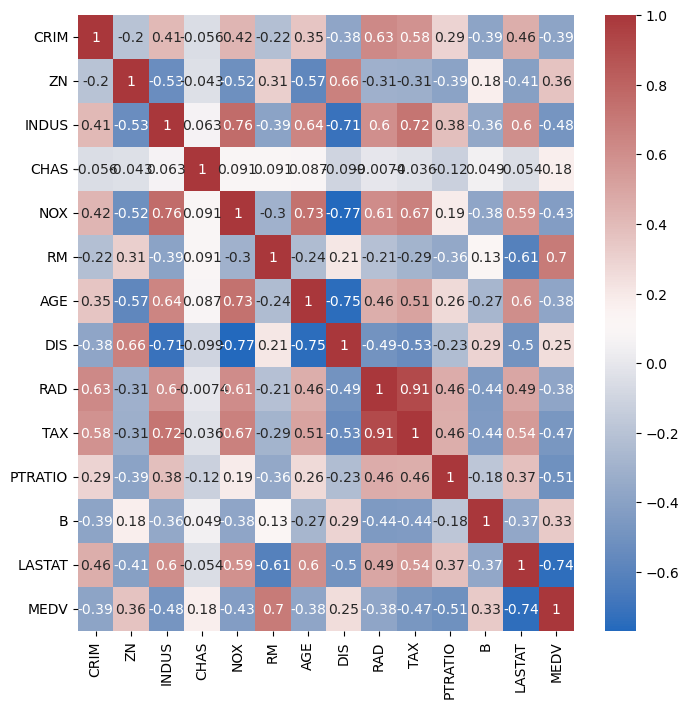

In [312]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=df.corr(), cmap='vlag', annot=True, ax=ax)

Focusing on MEDV
- LASTAT, PTRATIO, INDUS has neggative correlation, people also prefer lower lower classes, students, and industrials
- RM has positive correlation, of course more room more price.

Also please note of how other feature correlate to eachother. assume and assert it.
- INDUS relate to LASTAT, RAD
- CRIM relate to RAD, TAX, LASTAT
- etc.

In [313]:
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LASTAT']

Let's see distribution, find the problems of our data. \
We are expecting **Normal distribute data**

In [314]:
def gridPlot(df, cols):
    '''
    Plot all hisogram data for input column
    '''
    n = len(cols)
    col = 3
    row = math.ceil(n / 3)

    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(col * 3, row * 3))
    ax = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(data=df[col], ax=ax[i])
        ax[i].set_title(col)
    
    fig.tight_layout()

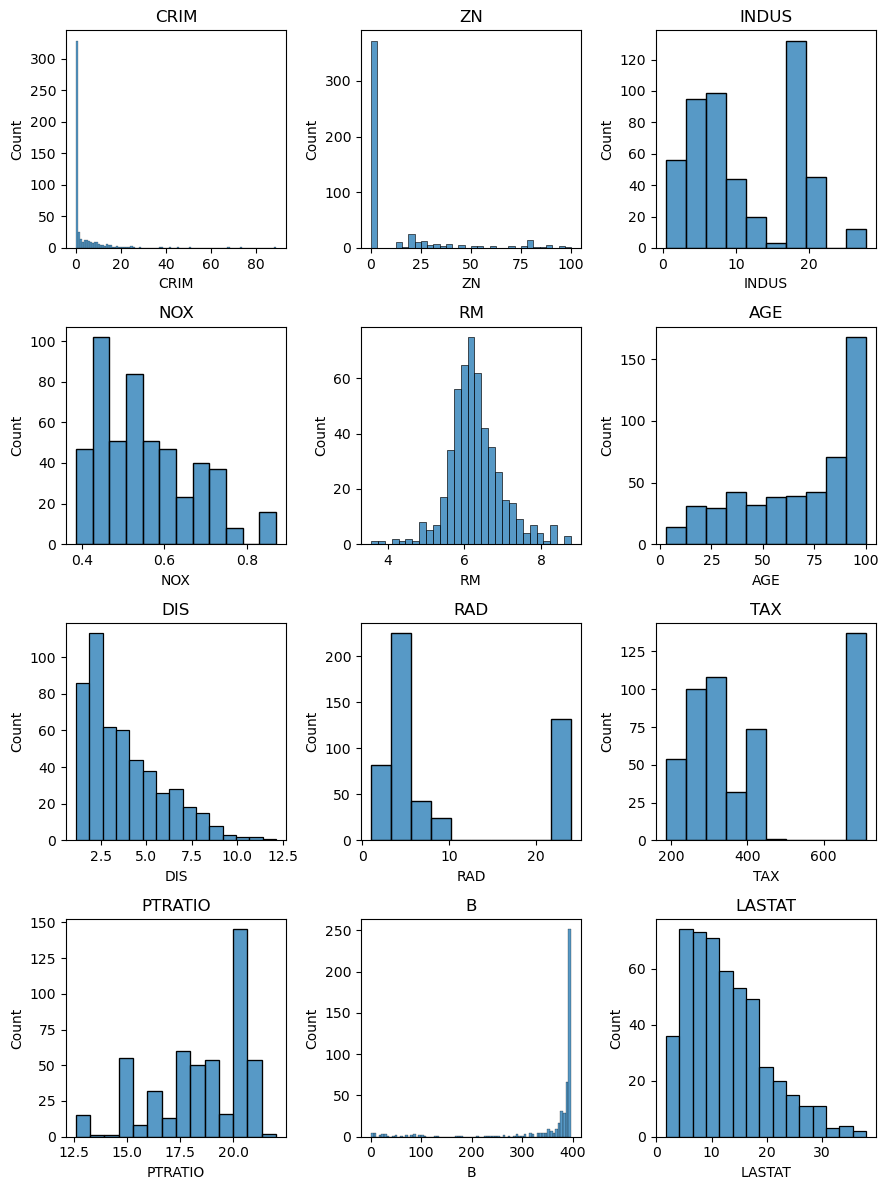

In [315]:
gridPlot(df=df, cols=numeric_cols)

- There are extremely high frquency value in CRIM, ZN, B
- Weired artifac at AGE, RAD, TAX it is probably some cap
- There are long tail on CRIM, ZN, B which possibly outliers
- That's highly skewed on NOX, DIS, LASTAT, AGE, B

we are going assert this hypothesis later.

But first, let's check each value

In [316]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LASTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- CRIM 75% of data is 3.677083, min is 0.006, max is 88.976, is that a warzone?, high density area?, if is, it suppose to have lower MEDC?
- ZN 75% of data is 12.5, max is 100, may be it rural area?, if is, it suppose to have lower MEDC, TAX?

- From correlation, higher CRIM area tend to be bigger inner city area (low DIS) with working class (high LASTAT) who work in industry (high INDUS) who not living here? highway (high RAD), but relatively lower MEDC maybe more room supply?.
- Form correlation, higher ZN higher DIS and Lower AGE, assume that is rural area from CBD, and newer building it should have lower MEDC and TAX.

In [317]:
df[df['CRIM'] > 20].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LASTAT,MEDV
count,18.000000,18.0,1.800000e+01,18.0,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.000000,18.000000,18.000000
mean,37.932856,0.0,1.810000e+01,0.0,0.679444,5.456722,95.022222,1.558867,24.0,666.0,20.2,278.038889,24.093889,9.633333
std,20.405889,0.0,3.655712e-15,0.0,0.034464,0.739099,6.329906,0.180228,0.0,0.0,0.0,155.127772,6.609559,3.164695
min,20.084900,0.0,1.810000e+01,0.0,0.597000,4.138000,78.700000,1.178100,24.0,666.0,20.2,2.600000,10.110000,5.000000
25%,23.834600,0.0,1.810000e+01,0.0,0.673000,5.038750,91.375000,1.428925,24.0,666.0,20.2,148.262500,20.215000,7.625000
50%,27.298200,0.0,1.810000e+01,0.0,0.693000,5.492000,98.100000,1.553600,24.0,666.0,20.2,377.595000,23.515000,9.600000
75%,44.691875,0.0,1.810000e+01,0.0,0.693000,5.922250,100.000000,1.655525,24.0,666.0,20.2,396.900000,28.055000,10.800000
max,88.976200,0.0,1.810000e+01,0.0,0.740000,6.968000,100.000000,1.866200,24.0,666.0,20.2,396.900000,36.980000,16.300000


In [318]:
df[df['CRIM'] < 0.083].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LASTAT,MEDV
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.045993,33.465385,4.958692,0.038462,0.452437,6.594923,42.982308,5.671594,3.592308,284.346154,17.490000,391.163231,7.127846,27.332308
std,0.020014,34.413423,4.306485,0.193052,0.047425,0.557488,19.872803,2.078343,1.612433,62.727998,1.877069,9.168893,2.777251,7.925498
min,0.006320,0.000000,0.460000,0.000000,0.385000,5.663000,6.000000,2.167500,1.000000,187.000000,12.600000,341.600000,1.980000,11.900000
25%,0.031718,0.000000,2.242500,0.000000,0.411500,6.144000,28.175000,3.956150,2.000000,242.000000,16.400000,390.695000,4.972500,22.000000
50%,0.045355,25.000000,3.695000,0.000000,0.440500,6.543000,38.450000,5.446400,4.000000,274.500000,17.800000,394.175000,6.850000,24.550000
75%,0.061455,70.000000,5.320000,0.000000,0.487000,6.973250,58.325000,6.982100,5.000000,329.000000,18.700000,396.900000,8.900000,31.900000
max,0.082650,100.000000,25.650000,1.000000,0.581000,8.034000,91.000000,12.126500,7.000000,469.000000,22.000000,396.900000,14.800000,50.000000


CRIM > 20 have 75% MEDV at 10.8 compare with \
CRIM < 0.083 have 75% MEDV at 31.9.

but for this expensive the 75% TAX is only 329 \
while high CRIM 75% TAX is 666 and suppose to be an outlier.

while TAX and RAD has 0.91 corelation, let's plot it too.

Wow! that's new, people willing to pay extra for their safety.

Let's visulize the data.

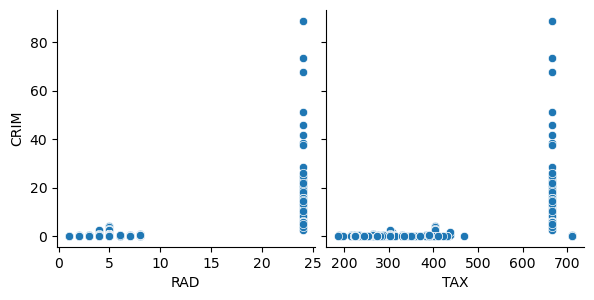

In [319]:
sns.pairplot(data=df, x_vars=['RAD', 'TAX'], y_vars=['CRIM'], height=3)

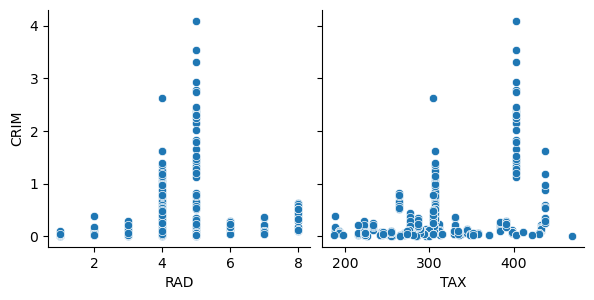

In [320]:
sns.pairplot(data=df.drop(df[df['TAX'] >= 666].index), x_vars=['RAD', 'TAX'], y_vars=['CRIM'], height=3)

In [321]:
len(df[df['TAX'] >= 666])

137

compare to drop them off. it is better isn't it? but we lose 137 sample or 27% it is too much lost.

From the correlation matrix, we can use other data to replace this outlier, should it be mean or just using regression?

In [322]:
# df1 = df.drop(df[df['TAX'] > 600].index)
# X = df1.drop(['TAX', 'MEDV', 'CHAS'], axis=1)
# y = df1['TAX']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

# steps = [
#     ('scalar', StandardScaler()),
#     ('poly', PolynomialFeatures(degree=2)),
#     ('model', LinearRegression())
# ]
# pipeline = Pipeline(steps=steps)

# model = pipeline.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print('MSE: ' + str(mse))
# print('r2: ' + str(r2))

MSE: 3361.73735489329
r2: 0.2894599975661116

there is a long tail on CRIM. Let's cap it to 30

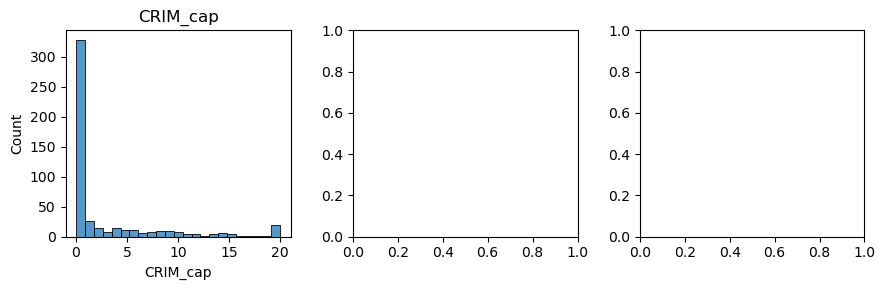

In [323]:
# Plot is difficalt to see let's cut high frequency value for sake of visibility
df['CRIM_cap'] = df['CRIM'].apply(lambda row: min(row, 20))
cut_cols = ['CRIM_cap']

gridPlot(df, cut_cols)

In [324]:
df = df.drop('CRIM_cap', axis=1)

In [325]:
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LASTAT     0.906460
MEDV       1.108098
dtype: float64

Let's make sure there are outliers by ploting **boxplot**

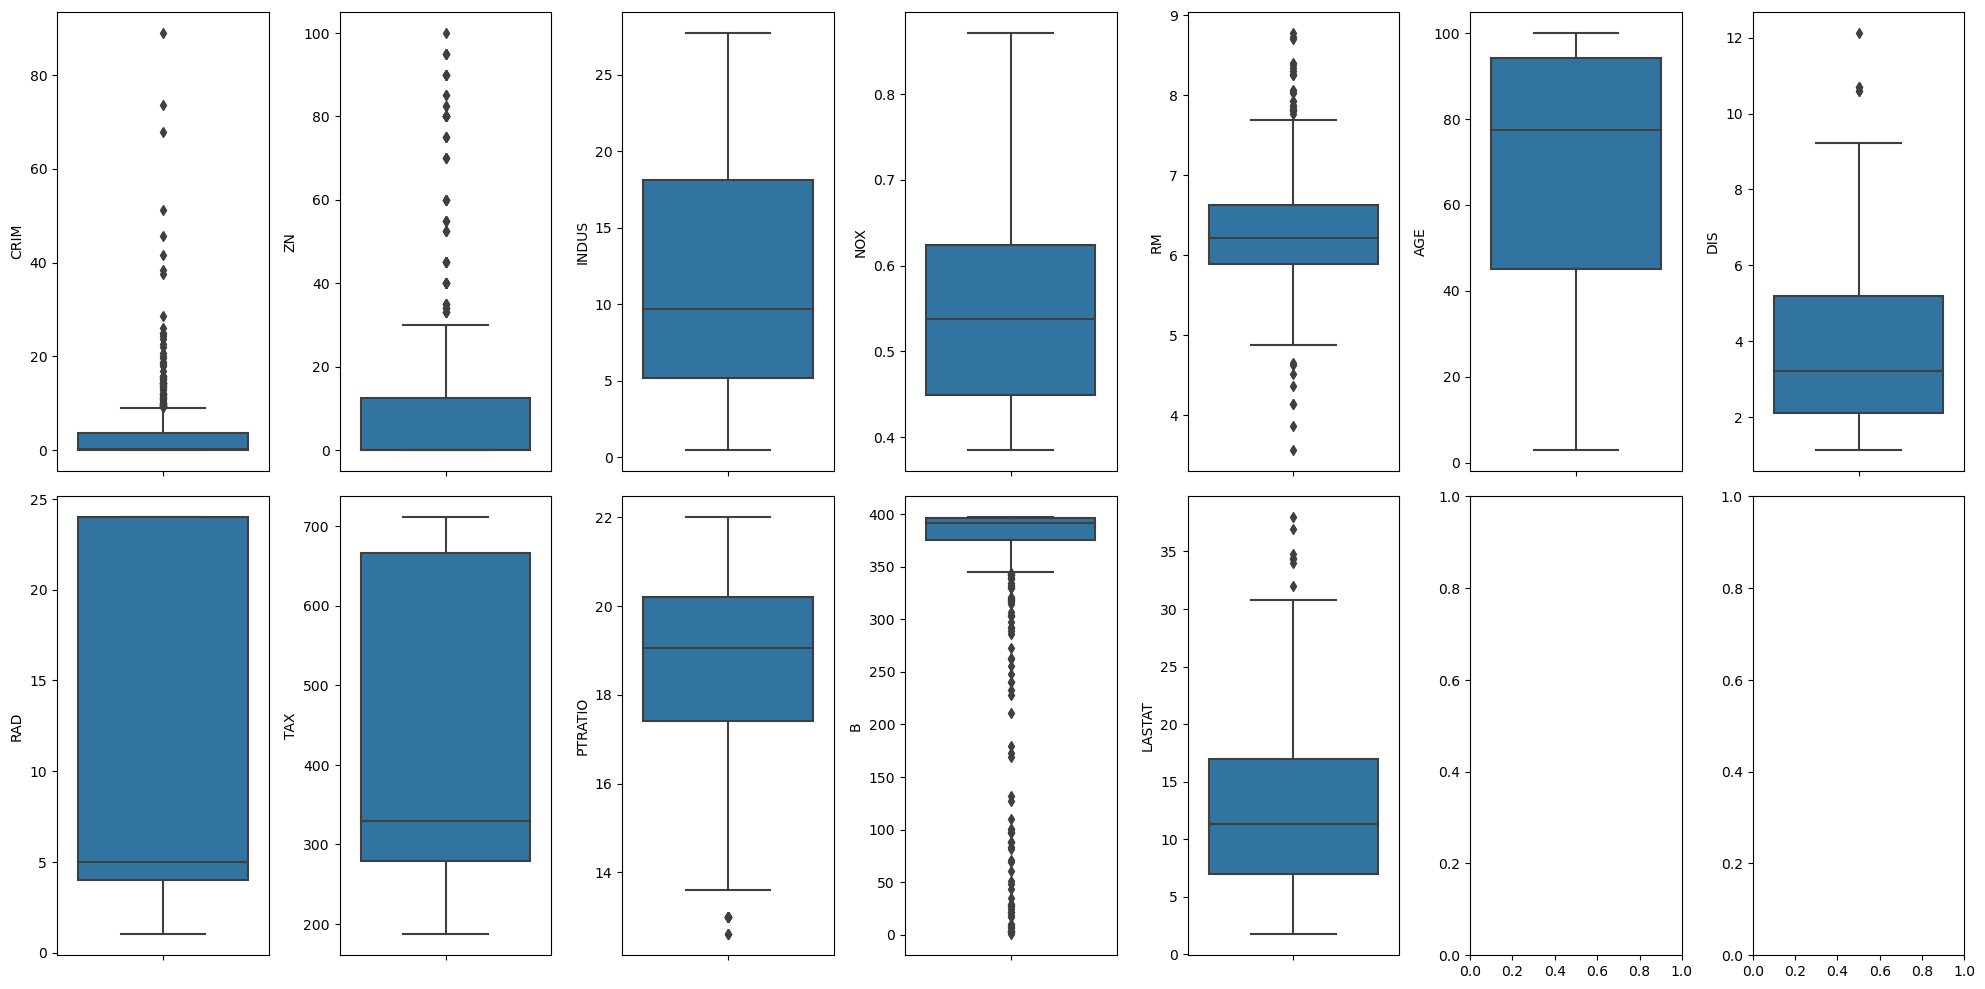

In [326]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
ax = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=col, data=df, ax=ax[i])

plt.tight_layout()

### Fix the problems

#### Noise - Outlier

There are 3 different ways to remove outlier
1. Inter-Quartile Range (IQR)
2. Standard deviation
3. Z-score
4. Modified Z-score

In this case we will use one of the most extensively used procedure, **Inter-Quartile Range (IQR)**

Q1 = 25% \
Q3 = 75% \
IQR = Q3-Q1 \
(Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR)

In [327]:
def drop_outlier(data, columns, num):
    '''
    data = data
    columns = comlumns you want to process
    num = num threshold, if number of outlier in a column exceed this threshold, the row will be dropped.
    '''
    
    outlier_row_list = []

    for col in columns:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_rows = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        outlier_row_list.extend(outlier_list_rows)
        
    outlier_row_list = Counter(outlier_row_list)        
    multiple_outliers = list( i for i, n in outlier_row_list.items() if n > num )
    print(f'Dropped: {len(multiple_outliers)} rows')
    
    data_out = data.drop(multiple_outliers, axis=0).reset_index(drop=True)
    print(f'Remaining rows: {data_out.shape[0]}')
    
    return data_out

In [328]:
df_dropped = drop_outlier(data=df, columns=numeric_cols, num=1)

Dropped: 52 rows
Remaining rows: 454


### Skewed data

I'm going to use Log transform

In [329]:
df_trans = df_dropped.copy()

trans_cols = df_trans.columns.drop(['INDUS', 'AGE', 'B'])
df_trans[trans_cols] = np.log1p(df_trans[trans_cols])

In [330]:
def ptf_tran(df, features):
    ptf = PowerTransformer(standardize=True)
    new_df = df
    
    for feature in features:
        new_df[feature] = pd.DataFrame(ptf.fit_transform(df[feature].values.reshape(-1,1)))
    return new_df

In [331]:
df_ptrans = ptf_tran(df_dropped, df_dropped.columns)

In [332]:
pd.DataFrame({'Original': df.skew(), 'Dropped_Outlier':  df_dropped.skew(), 'Logged': df_trans.skew(), 'PTF': df_ptrans.skew()})

,Original,Dropped_Outlier,Logged,PTF
CRIM,5.223149,0.649155,1.499369,0.649155
ZN,2.225666,1.100430,1.217463,1.100430
INDUS,0.295022,-0.062294,0.448291,-0.062294
CHAS,3.405904,3.240871,3.240871,3.240871
NOX,0.729308,0.115909,0.775965,0.115909
RM,0.403612,-0.023446,0.154545,-0.023446
AGE,-0.598963,-0.397586,-0.571557,-0.397586
DIS,1.011781,0.042513,0.217201,0.042513
RAD,1.004815,0.032426,0.713923,0.032426
TAX,0.669956,0.083922,0.478268,0.083922


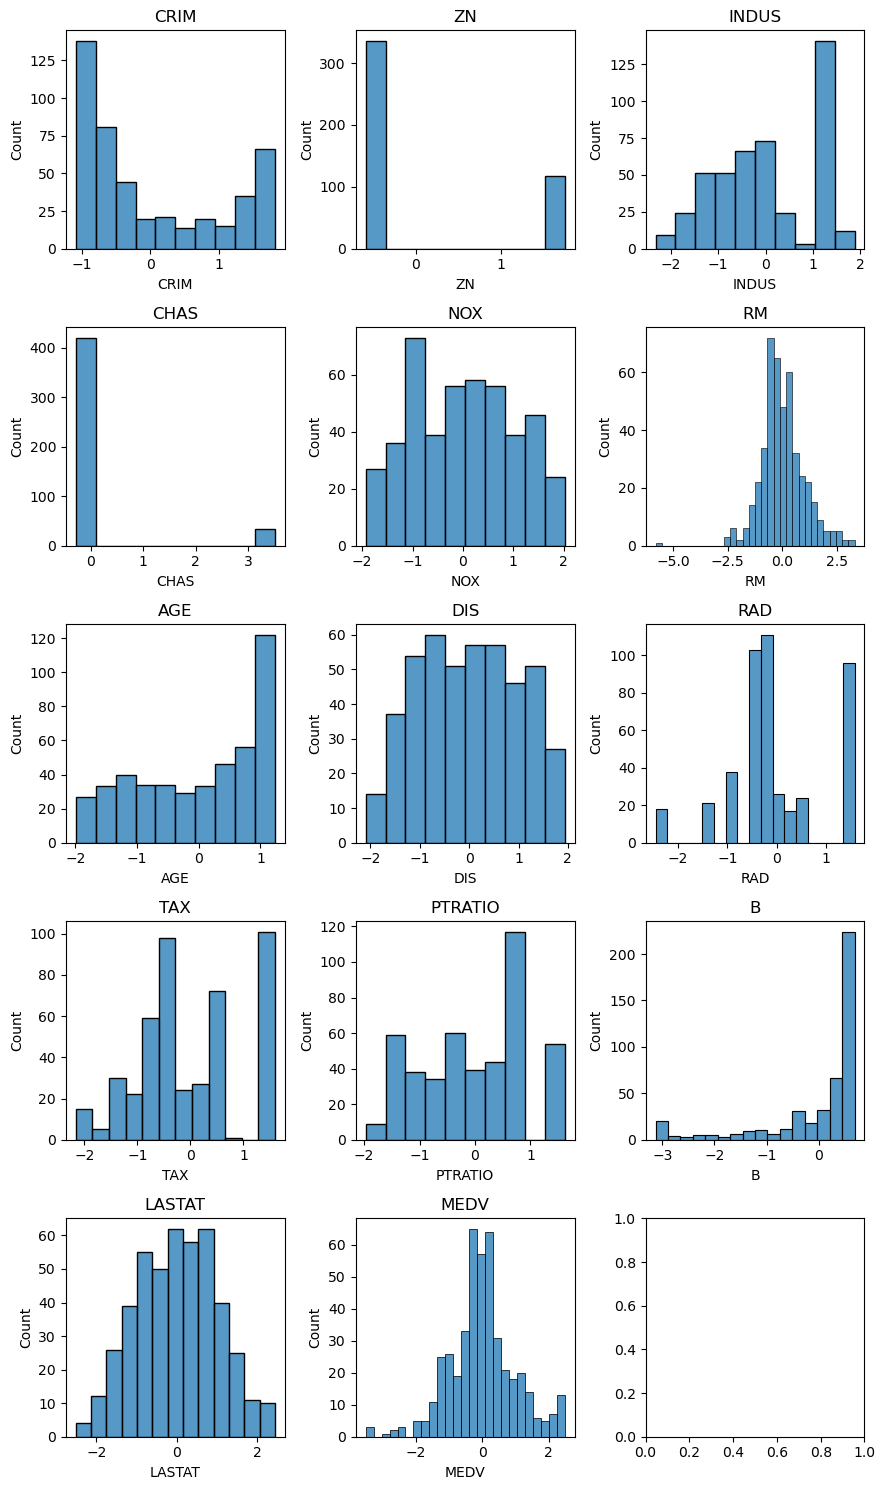

In [333]:
gridPlot(df_ptrans, df_ptrans.columns)

My assumption: 
1. RM correlate to size of the house hence affecting the MEDV
2. ZN the more density of residentaul, the more urbanize area, more demand, hence more MEDV
3. Proportion of black peoples, really?

Now let's see trend.

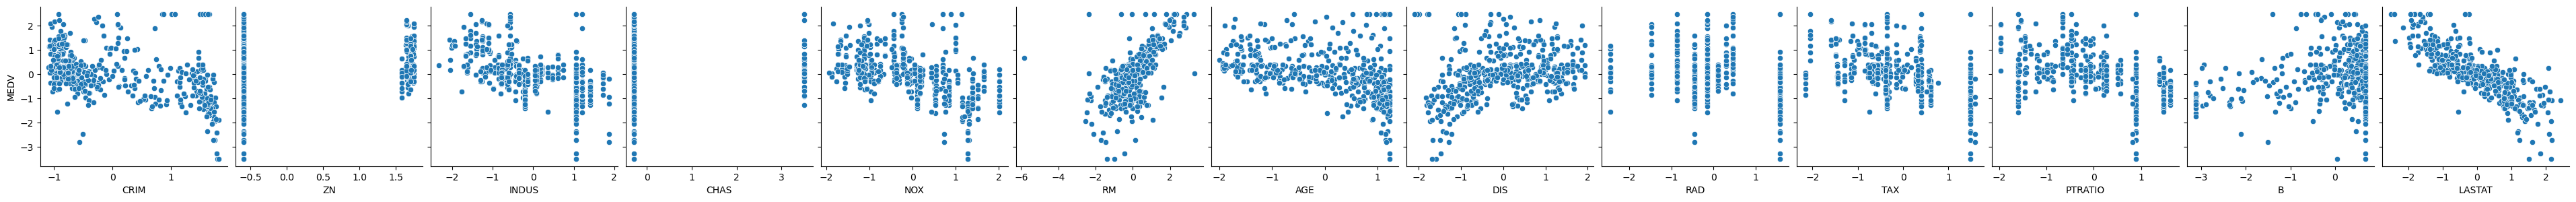

In [334]:
sns.pairplot(data=df_ptrans, x_vars=df_ptrans.columns[:-1], y_vars=['MEDV'], height=3)

## Predict

In [352]:
X = df_ptrans.drop('MEDV', axis=1)
y = df_ptrans['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 5)

print('Number of training records: ' + str(X_train.shape[0]))
print('Number of testing records: ' + str(X_test.shape[0]))

Number of training records: 317
Number of testing records: 137


In [353]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]
pipeline = Pipeline(steps)


model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('MSE: ' + str(mse))
print('r2: ' + str(r2))

MSE: 0.20696729767030464
r2: 0.7834049837407879


In [354]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)

y_pred = XGBR.predict(X_test)

In [355]:
r2_score(y_test, y_pred)

0.878647601192873

## Hyperparameter tuning

In [371]:
from sklearn.datasets import make_classification

param_grid = {'max_depth': [2, 7, 10, 20],
              'eta': [0.1, 0.2, 0.4, 0.8],
              'subsample': [0.1, 0.2, 0.4, 0.8],
              'colsample_bytree': [0.1, 0.2, 0.4, 0.8]
              }
base_estimator = XGBRegressor()
sh = HalvingGridSearchCV(base_estimator , param_grid=param_grid, cv=5,
                         resource='n_estimators',
                         max_resources=10).fit(X_train, y_train)

In [372]:
sh.best_score_

0.7491457492992477

In [373]:
y_pred = sh.best_estimator_.predict(X_test)

In [374]:
r2_score(y_test, y_pred)

0.7846936842641161